In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial"

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

praia da vitoria pt
albany au
lorengau pg
nurobod uz
mamou gn
petropavlovka ru
ancud cl
bredasdorp za
poum nc
yellowknife ca
lavrentiya ru
cape town za
karkaralinsk kz
salym ru
tabiauea ki
rikitea pf
new norfolk au
boddam gb
kuytun ru
marawi sd
busselton au
geraldton au
guerrero negro mx
port hardy ca
rikitea pf
lompoc us
tasbuget kz
saint-pierre pm
kavieng pg
cidreira br
nanortalik gl
tsihombe mg
parrita cr
qaanaaq gl
whitehorse ca
hermanus za
rikitea pf
kahului us
hermanus za
ksenyevka ru
jamestown sh
busselton au
adrar dz
ponta do sol cv
mataura pf
panaba mx
geraldton au
ushuaia ar
albany au
hobart au
caldwell us
ushuaia ar
bengkulu id
rosarno it
vedeno ru
port-gentil ga
alihe cn
nanakuli us
te anau nz
saint-philippe re
kahului us
lagoa pt
mataura pf
quatre cocos mu
santa cruz cr
busselton au
mataura pf
narsaq gl
nisia floresta br
mataura pf
taolanaro mg
coromandel br
port hardy ca
turka ru
tucuman ar
kapaa us
port alfred za
moscow us
lorengau pg
atuona pf
katsuura jp
unity ca
westp

ca mau vn
vardo no
sao filipe cv
rikitea pf
half moon bay us
waddan ly
namatanai pg
bredasdorp za
tuktoyaktuk ca
tiksi ru
vaini to
ola ru
san luis ar
sena madureira br
port macquarie au
kapaa us
fairbanks us
hami cn
sinnamary gf
mar del plata ar
gamba ga
bac lieu vn
natal br
alice springs au
qurunbaliyah tn
dikson ru
atuona pf
bredasdorp za
atuona pf
katsuura jp
broken hill au
novyy urengoy ru
carnarvon au
nizhneyansk ru
belushya guba ru
ribeira grande pt
busselton au
geraldton au
saravena co
gezing in
rikitea pf
bredasdorp za
vaini to
puerto ayora ec
saint anthony ca
altay cn
san carlos de bariloche ar
hilo us
lazaro cardenas mx
esmoriz pt
dikson ru
esperance au
norman wells ca
thunder bay ca
tilichiki ru
ushuaia ar
severo-kurilsk ru
chitral pk
montepuez mz
kapaa us
northam au
avarua ck
kidal ml
sukhovolya ua
hermanus za
qaanaaq gl
witrivier za
poltavka ru
uige ao
xinzhou cn
faridpur in
port alfred za
loknya ru
new norfolk au
iqaluit ca
malanje ao
ushuaia ar
carnarvon au
longyearbyen 

katobu id
mantua cu
fengcheng cn
hirado jp
constitucion mx
saskylakh ru
castro cl
nuuk gl
touros br
kibre mengist et
rikitea pf
launceston au
sobolevo ru
hithadhoo mv
kodiak us
chenzhou cn
kaitangata nz
neosho us
busselton au
berdigestyakh ru
butaritari ki
hithadhoo mv
kamenskiy ru
husavik is
taolanaro mg
taolanaro mg
waddan ly
green river us
chokurdakh ru
mataura pf
vaini to
broken hill au
ostrovnoy ru
qaanaaq gl
portland au
attawapiskat ca
ramanuj ganj in
grand river south east mu
kodiak us
henties bay na
rungata ki
mayahi ne
bredasdorp za
wangkui cn
bluff nz
khandyga ru
vostok ru
busselton au
thompson ca
atuona pf
bajo baudo co
iqaluit ca
yulara au
barrow us
atuona pf
kruisfontein za
katsuura jp
tuktoyaktuk ca
husavik is
bluff nz
fortuna us
khatanga ru
hambantota lk
atuona pf
codrington ag
mataura pf
port alfred za
jamestown sh
ushuaia ar
salinas ec
faya td
punta arenas cl
bredasdorp za
new norfolk au
cabo san lucas mx
ushuaia ar
romitan uz
vaini to
vaini to
mataura pf
hobart au
vai

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | nurobod
Processing Record 5 of Set 1 | mamou
Processing Record 6 of Set 1 | petropavlovka
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 14 of Set 1 | salym
Processing Record 15 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | boddam
Processing Record 19 of Set 1 | kuytun
Processing Record 20 of Set 1 | marawi
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Se

Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | pascagoula
Processing Record 41 of Set 4 | santa rosa
Processing Record 42 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 4 | puerto lempira
Processing Record 44 of Set 4 | xuddur
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | bargal
City not found. Skipping...
Processing Record 47 of Set 4 | manosque
Processing Record 48 of Set 4 | rhyl
Processing Record 49 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 4 | kanye
Processing Record 1 of Set 5 | martapura
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | agadir
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | garowe
Processing Record 7 of Set 5 | plast
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | pangnirtung
Processing Record 10 of Set 5 | kidal
Processing

Processing Record 27 of Set 8 | port macquarie
Processing Record 28 of Set 8 | fairbanks
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | gamba
Processing Record 31 of Set 8 | bac lieu
Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | qurunbaliyah
City not found. Skipping...
Processing Record 34 of Set 8 | novyy urengoy
Processing Record 35 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 8 | saravena
Processing Record 37 of Set 8 | gezing
Processing Record 38 of Set 8 | saint anthony
Processing Record 39 of Set 8 | altay
Processing Record 40 of Set 8 | san carlos de bariloche
Processing Record 41 of Set 8 | lazaro cardenas
Processing Record 42 of Set 8 | esmoriz
Processing Record 43 of Set 8 | esperance
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | thunder bay
Processing Record 46 of Set 8 | tilichiki
Processing Record 47 of Set 8 | chitral
Processing Record 48 of Set 8 | montepuez
Pro

Processing Record 16 of Set 12 | maymyo
Processing Record 17 of Set 12 | palana
Processing Record 18 of Set 12 | ternate
Processing Record 19 of Set 12 | stokmarknes
Processing Record 20 of Set 12 | chicama
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | darhan
Processing Record 23 of Set 12 | kamennomostskoye
Processing Record 24 of Set 12 | morondava
Processing Record 25 of Set 12 | paulo afonso
Processing Record 26 of Set 12 | jimeta
Processing Record 27 of Set 12 | yaan
Processing Record 28 of Set 12 | mrirt
City not found. Skipping...
Processing Record 29 of Set 12 | novo aripuana
Processing Record 30 of Set 12 | katobu
Processing Record 31 of Set 12 | mantua
Processing Record 32 of Set 12 | fengcheng
Processing Record 33 of Set 12 | hirado
Processing Record 34 of Set 12 | kibre mengist
Processing Record 35 of Set 12 | launceston
Processing Record 36 of Set 12 | sobolevo
Processing Record 37 of Set 12 | chenzhou
Processing Record 38 of Set 12 | neosho
P

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia Da Vitoria,38.7333,-27.0667,60.80,88,75,24.90,PT,2021-04-03 22:38:22
1,Albany,42.6001,-73.9662,50.00,23,40,13.80,US,2021-04-03 22:34:30
2,Lorengau,-2.0226,147.2712,81.37,79,100,7.67,PG,2021-04-03 22:38:23
3,Nurobod,40.9056,69.8023,57.20,51,75,4.61,UZ,2021-04-03 22:38:23
4,Mamou,10.5000,-12.0000,77.94,51,66,4.07,GN,2021-04-03 22:38:24
5,Petropavlovka,50.6114,105.3196,32.18,51,9,3.42,RU,2021-04-03 22:38:24
6,Ancud,-41.8697,-73.8203,60.80,63,0,4.61,CL,2021-04-03 22:38:24
7,Bredasdorp,-34.5322,20.0403,51.80,87,0,2.30,ZA,2021-04-03 22:38:24
8,Poum,-20.2333,164.0167,80.26,83,81,18.79,NC,2021-04-03 22:38:25
9,Yellowknife,62.4560,-114.3525,10.99,61,20,4.61,CA,2021-04-03 22:36:29


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_df = city_data_df[new_column_order]
new_city_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Praia Da Vitoria,PT,2021-04-03 22:38:22,38.7333,-27.0667,60.80,88,75,24.90
1,Albany,US,2021-04-03 22:34:30,42.6001,-73.9662,50.00,23,40,13.80
2,Lorengau,PG,2021-04-03 22:38:23,-2.0226,147.2712,81.37,79,100,7.67
3,Nurobod,UZ,2021-04-03 22:38:23,40.9056,69.8023,57.20,51,75,4.61
4,Mamou,GN,2021-04-03 22:38:24,10.5000,-12.0000,77.94,51,66,4.07


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

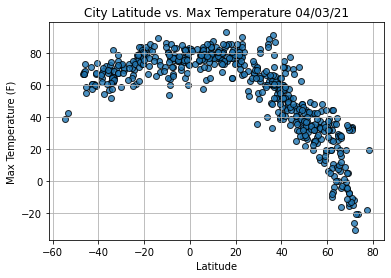

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

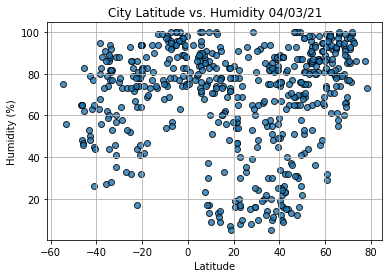

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

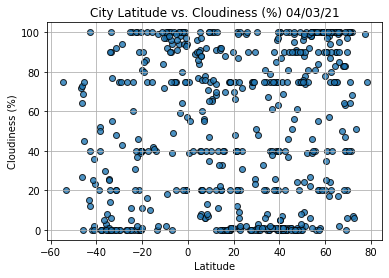

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

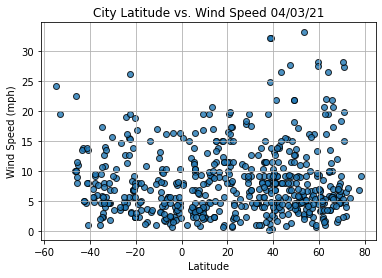

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()